
## Guide to Markdown

https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

# Random Walk Generation

#### Geometric Brownian Model (GBM) equation : $$ \frac{S_{t+dt} - S_{t} }{S_{t}} = \mu*dt + \sigma*\sqrt{dt}*\xi_{t} $$

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

def gbm(n_years=10, n_scenarios=1000, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock Price using a geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [4]:
p = gbm(100,n_scenarios=5)

In [5]:
p.shape

(1200, 5)

In [6]:
p.head()

,0,1,2,3,4
0,104.419945,110.294046,99.565438,91.600638,101.212993
1,107.903133,110.451840,94.328936,93.962135,97.897692
2,104.035236,114.854634,92.175147,97.372668,89.967136
3,109.594311,111.249741,90.404406,95.176889,95.393984
4,107.582389,119.961955,87.130452,93.193920,98.743617


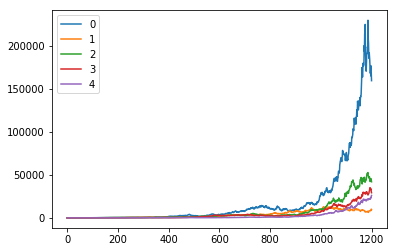

In [7]:
p.plot()

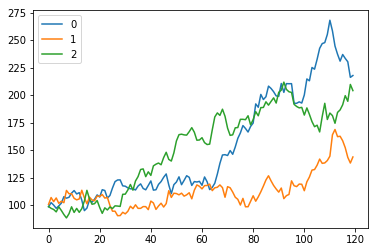

In [8]:
p = gbm(10,n_scenarios=3)
p.plot()

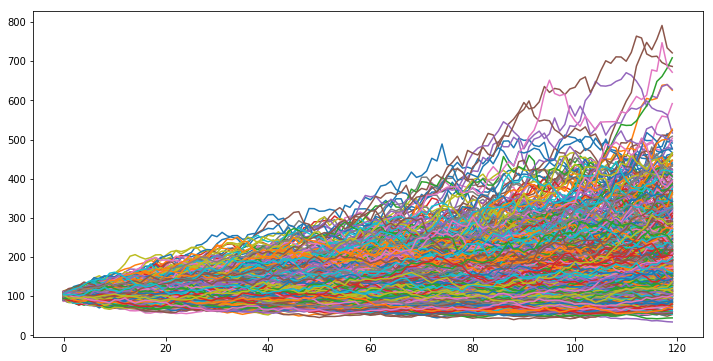

In [9]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [10]:
%timeit p = gbm(n_years=10, n_scenarios=1000)

9.46 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


1.76 s ± 66.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


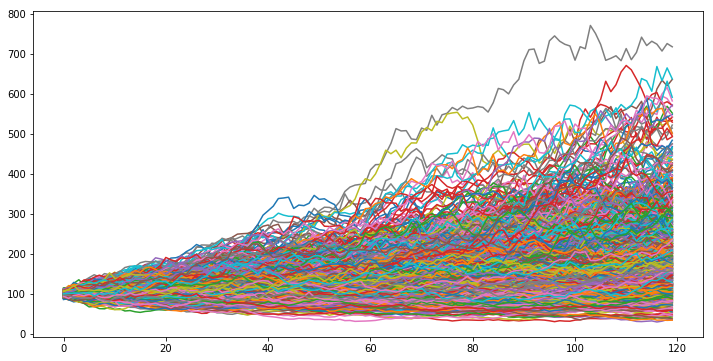

In [ ]:
%timeit p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [33]:
def gbm0(n_years=10, n_scenarios=1000, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock Price using a geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock Price using a geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    #less loop thus efficience
    rets_plus_1 = np.random.normal(loc=1+mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps, n_scenarios)) 
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [34]:
%timeit gbm0(n_years=5, n_scenarios=1000)

4.77 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit gbm1(n_years=5, n_scenarios=1000)

4.09 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit gbm(n_years=5, n_scenarios=1000)

4.48 ms ± 82.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
def gbm(n_years=10, n_scenarios=1000, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock Price using a geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    #less loop thus efficience
    rets_plus_1 = np.random.normal(loc=1+mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps, n_scenarios)) 
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [1]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

NameError: name 'gbm' is not defined

In [1]:
def gbm(n_years=10, n_scenarios=1000, mu = 0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock Price using a geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    #less loop thus efficience
    rets_plus_1 = np.random.normal(loc=1+mu*dt,scale=sigma*np.sqrt(dt),size=(n_steps, n_scenarios)) 
    rets_plus_1[0] = 1 # first raw to 1 aka return to 0
    # to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [2]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

NameError: name 'np' is not defined

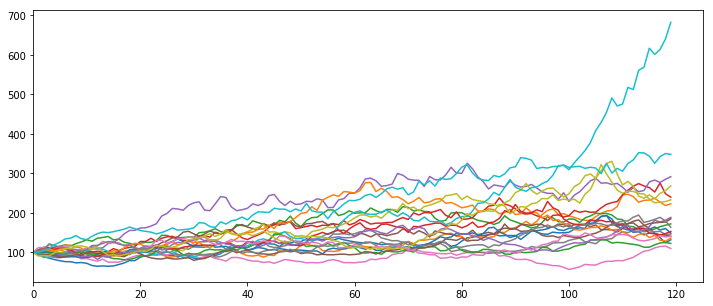

In [54]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,5), xlim=0)